In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
timestamps = pd.date_range('2023-01-01', '2024-01-05', freq='1h')
ids = np.arange(0, len(timestamps), 1)

angle0 = 75  # degrees
angle1 = 45  # degrees
angle2 = 15  # degrees
angle3 = 0  # degrees

a_result = []

In [59]:
def solar_flux_calculator(timestep_id, I0_p, angles, timezone_diff=-8, latitude=70, slope_orientation=88):
    """This function calculates the effective solar radiation flux on a sloped surface. The method from Buffo (1972) is used, assuming that the radiaton on the surface already includes the atmospheric transmission coefficient."""
    # get current timestamp
    current_timestamp = timestamps[timestep_id]
    
    # latitude
    phi = latitude / 360 * 2 * np.pi
    
    # declination, Sarbu (2017)
    delta = (23.45 * np.sin(
        (360/365 * (284 + current_timestamp.dayofyear)) / 360 * 2 * np.pi
        )) / 360 * 2 * np.pi
    
    # hour angle, for Alaska timezone difference w.r.t. UTC is -8h
    local_hour_of_day = current_timestamp.hour #+ timezone_diff
    # convert to hour angle
    h = (((local_hour_of_day - 12) % 24)/24) * 2 * np.pi
    
    if h >= np.pi:
        h = -((2*np.pi)-h)
    
    # solar altitude
    a = np.arcsin(np.cos(phi) * np.cos(delta) * np.cos(h) + np.sin(phi) * np.sin(delta))
    a_result.append(a)
        
    solar_azimuth = np.arccos((np.sin(a) * np.sin(phi) - np.sin(delta)) / (np.cos(a) * np.cos(phi))) * h / np.abs(h)
    
    z = 1/2 * np.pi - a
    
    psi = -(slope_orientation + 90) / 360 * 2 * np.pi
    
    gamma = solar_azimuth - psi
    
    if np.degrees(gamma) > 90 and np.degrees(gamma) < 270:
        gamma = 0
        
    tilt_angle = angles / 360 * 2 * np.pi
    
    theta = np.arccos(np.cos(a) * np.cos(np.abs(gamma)) * np.sin(tilt_angle) + np.sin(a) * np.cos(tilt_angle))
    
    

    # # local angles
    # alpha = 1/2 * np.pi - angles
    
    # # slope aspect clockwise from the north
    # beta = (90 - slope_orientation) / 360 * 2 * np.pi
    
    # # calculate altitude angle off of the horizontal that the suns rays strike a horizontal surface
    # A = np.arcsin(np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.cos(h))
    
    # # calculate azimuth
    # AZ = np.arcsin(-np.cos(delta) * np.sin(h) / np.cos(A))
    
    # # need to correct for when close to solstices
    # if np.cos(h) <= np.tan(delta) / np.tan(phi):
    #     if local_hour_of_day <= 12:
    #         AZ = -np.pi + np.abs(AZ)
    #     else:
    #         AZ = np.pi - AZ
    
    
    # # calculate Z
    # Z = AZ + 1/2 * np.pi
    
    # # calculate angle between the surface and the radiation
    # theta = np.arcsin(np.sin(A) * np.cos(alpha) - np.cos(A) * np.sin(alpha) * np.sin(Z - beta))
    
    # calculate angle-corrected radiation
    I = I0_p * np.sin(theta)
            
    return I

In [60]:
angle0_result = []
angle1_result = []
angle2_result = []
angle3_result = []

for id in ids:
    angle0_result.append(solar_flux_calculator(id, 1, angle0))
    angle1_result.append(solar_flux_calculator(id, 1, angle1))
    angle2_result.append(solar_flux_calculator(id, 1, angle2))
    angle3_result.append(solar_flux_calculator(id, 1, angle3))

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_54360\947677247.py:26: RuntimeWarning: invalid value encountered in arccos
  solar_azimuth = np.arccos((np.sin(a) * np.sin(phi) - np.sin(delta)) / (np.cos(a) * np.cos(phi))) * h / np.abs(h)
C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_54360\947677247.py:26: RuntimeWarning: invalid value encountered in scalar divide
  solar_azimuth = np.arccos((np.sin(a) * np.sin(phi) - np.sin(delta)) / (np.cos(a) * np.cos(phi))) * h / np.abs(h)


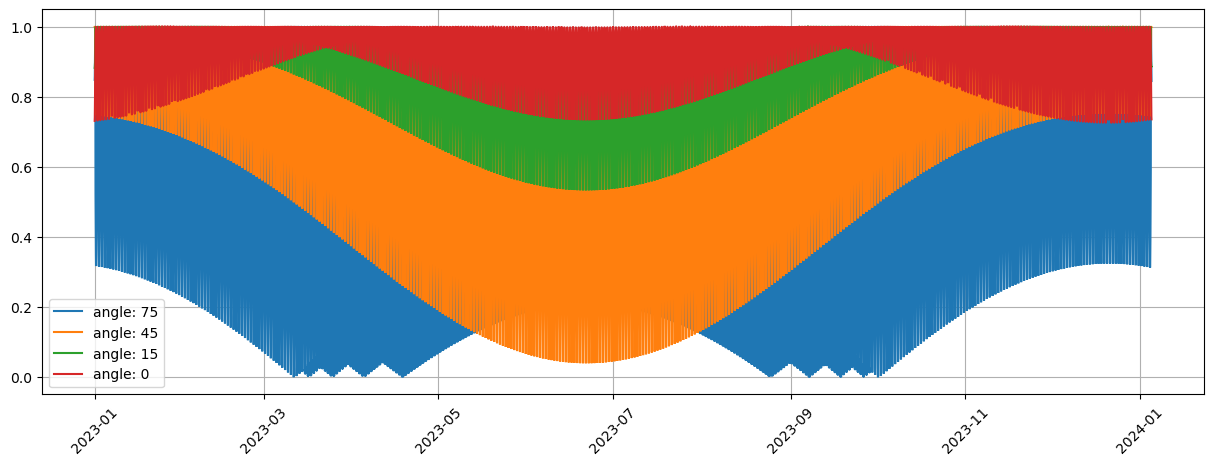

In [61]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(timestamps, angle0_result, label=f'angle: {angle0}')
ax.plot(timestamps, angle1_result, label=f'angle: {angle1}')
ax.plot(timestamps, angle2_result, label=f'angle: {angle2}')
ax.plot(timestamps, angle3_result, label=f'angle: {angle3}')

ax.legend()
ax.grid()

plt.xticks(rotation=45);

In [62]:
plt.close()

False
[-0.7506946775730388, -0.7506946775730388, -0.7506946775730388, -0.7506946775730388, -0.7361235219413306, -0.7361235219413306, -0.7361235219413306, -0.7361235219413306, -0.6944607030176575, -0.6944607030176575, -0.6944607030176575, -0.6944607030176575, -0.6309881354157594, -0.6309881354157594, -0.6309881354157594, -0.6309881354157594, -0.5524153607501732, -0.5524153607501732, -0.5524153607501732, -0.5524153607501732, -0.46544455980380717, -0.46544455980380717, -0.46544455980380717, -0.46544455980380717, -0.37615049380413884, -0.37615049380413884, -0.37615049380413884, -0.37615049380413884, -0.28990954411263326, -0.28990954411263326, -0.28990954411263326, -0.28990954411263326, -0.21151441289948028, -0.21151441289948028, -0.21151441289948028, -0.21151441289948028, -0.145252978303281, -0.145252978303281, -0.145252978303281, -0.145252978303281, -0.09485670823425393, -0.09485670823425393, -0.09485670823425393, -0.09485670823425393, -0.06330774377869751, -0.06330774377869751, -0.063307

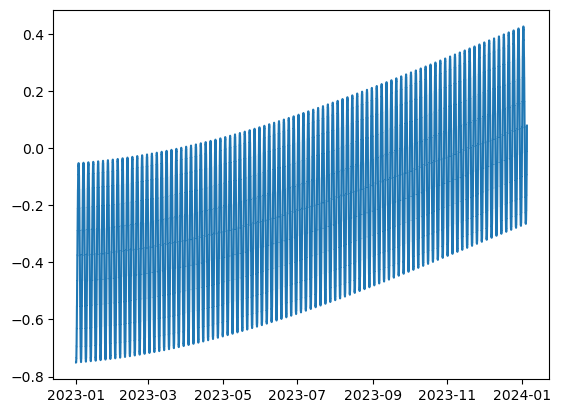

In [63]:
a_result_array = np.array(a_result)

print(all((a_result_array>0) * (a_result_array<(1/2*np.pi))))

print(a_result)

plt.plot(timestamps, a_result[:len(timestamps)])